<a href="https://colab.research.google.com/github/abdallahatyeh/testrepo/blob/master/ARIMA_NFuturePoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Price Data Prediction using ARIMA and its Extensions

Just as a reminder, "time series data" = data that is made up of a sequence of data points taken at successive equally spaced points in time.

#### Load and Prepare the Price Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab 
import scipy.stats as stats

In [2]:
data = pd.read_csv('tickets.csv')

In [3]:
data['itinerary_dTimeUTC'] = pd.to_datetime(data['itinerary_dTimeUTC'])
# sort by date
data.sort_values(by='itinerary_dTimeUTC', inplace=True)
# make the date column as index
data.set_index('itinerary_dTimeUTC', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8278 entries, 2019-10-12 07:00:00 to 2020-02-11 22:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   8278 non-null   int64
dtypes: int64(1)
memory usage: 129.3 KB


In [4]:
data.index

DatetimeIndex(['2019-10-12 07:00:00', '2019-10-12 07:05:00',
               '2019-10-12 08:00:00', '2019-10-12 08:15:00',
               '2019-10-12 08:45:00', '2019-10-12 08:50:00',
               '2019-10-12 09:25:00', '2019-10-12 09:50:00',
               '2019-10-12 10:00:00', '2019-10-12 10:15:00',
               ...
               '2020-02-11 19:30:00', '2020-02-11 19:30:00',
               '2020-02-11 19:50:00', '2020-02-11 20:10:00',
               '2020-02-11 20:30:00', '2020-02-11 20:55:00',
               '2020-02-11 21:00:00', '2020-02-11 21:05:00',
               '2020-02-11 21:20:00', '2020-02-11 22:00:00'],
              dtype='datetime64[ns]', name='itinerary_dTimeUTC', length=8278, freq=None)

In [5]:
data.head()

,price
itinerary_dTimeUTC,
2019-10-12 07:00:00,61
2019-10-12 07:05:00,110
2019-10-12 08:00:00,396
2019-10-12 08:15:00,301
2019-10-12 08:45:00,116


In [6]:
#data['2019-10-12':'2019-10-12']

In [7]:
data.describe()

,price
count,8278.000000
mean,116.379560
std,89.678579
min,21.000000
25%,64.000000
50%,90.000000
75%,130.000000
max,1141.000000


###ARIMA MODELS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


predicted=73.835922, expected=60.000000
predicted=72.900171, expected=54.000000
predicted=71.215564, expected=35.000000
predicted=67.002221, expected=21.000000
predicted=61.972205, expected=49.000000
predicted=62.988998, expected=108.000000
predicted=72.566714, expected=95.000000
predicted=75.532741, expected=81.000000
predicted=76.204553, expected=85.000000
predicted=76.411559, expected=90.000000
predicted=78.490509, expected=56.000000
predicted=74.135559, expected=90.000000
predicted=76.998501, expected=59.000000
predicted=73.860487, expected=59.000000
predicted=71.367244, expected=83.000000
predicted=74.618951, expected=144.000000
predicted=85.851416, expected=51.000000
predicted=78.094470, expected=128.000000
predicted=85.876091, expected=54.000000
predicted=79.049233, expected=167.000000
predicted=93.038185, expected=70.000000
predicted=86.399389, expected=88.000000
predicted=85.630281, expected=64.000000
predicted=81.529815, expected=50.000000
predicted=76.913386, expected=106.00

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=83.684457, expected=156.000000
predicted=94.813898, expected=73.000000
predicted=88.674103, expected=35.000000
predicted=79.277849, expected=44.000000
predicted=75.035314, expected=75.000000
predicted=77.133841, expected=81.000000
predicted=78.497169, expected=56.000000
predicted=76.225603, expected=73.000000
predicted=77.039677, expected=364.000000
predicted=123.528919, expected=219.000000
predicted=129.446262, expected=81.000000
predicted=112.506321, expected=45.000000
predicted=97.104253, expected=65.000000
predicted=92.405264, expected=71.000000
predicted=90.123184, expected=44.000000
predicted=84.270308, expected=66.000000
predicted=83.951656, expected=89.000000
predicted=87.050696, expected=126.000000
predicted=94.536263, expected=59.000000
predicted=88.335950, expected=35.000000
predicted=80.798631, expected=91.000000
predicted=84.943487, expected=81.000000
predicted=84.942032, expected=54.000000
predicted=81.485586, expected=80.000000
predicted=82.995207, expected=86.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=155.274439, expected=187.000000
predicted=147.778880, expected=130.000000
predicted=135.945661, expected=130.000000
predicted=130.101175, expected=135.000000
predicted=128.080031, expected=105.000000
predicted=122.459144, expected=105.000000
predicted=119.315169, expected=106.000000
predicted=117.597209, expected=67.000000
predicted=109.637217, expected=80.000000
predicted=107.656177, expected=111.000000
predicted=110.728113, expected=77.000000
predicted=106.770372, expected=73.000000
predicted=103.468378, expected=106.000000
predicted=106.439314, expected=54.000000
predicted=99.518251, expected=120.000000
predicted=105.665800, expected=128.000000
predicted=110.296995, expected=120.000000
predicted=111.701604, expected=98.000000
predicted=109.065737, expected=104.000000
predicted=108.497715, expected=81.000000
predicted=104.432437, expected=137.000000
predicted=110.892100, expected=96.000000
predicted=107.524466, expected=96.000000
predicted=106.463015, expected=71.000000
pre

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=113.043817, expected=96.000000
predicted=110.053114, expected=61.000000
predicted=102.653097, expected=98.000000
predicted=104.008111, expected=91.000000
predicted=102.826016, expected=130.000000
predicted=109.082698, expected=106.000000
predicted=108.506109, expected=99.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=107.059567, expected=96.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=105.691250, expected=132.000000
predicted=110.020275, expected=99.000000
predicted=108.203000, expected=86.000000
predicted=104.739340, expected=64.000000
predicted=99.101608, expected=62.000000
predicted=95.199136, expected=75.000000
predicted=94.595664, expected=85.000000
predicted=95.456220, expected=84.000000
predicted=95.473904, expected=21.000000
predicted=85.095807, expected=58.000000
predicted=84.460112, expected=84.000000
predicted=87.136575, expected=81.000000
predicted=88.743847, expected=85.000000
predicted=89.728639, expected=130.000000
predicted=97.354415, expected=96.000000
predicted=96.415473, expected=130.000000
predicted=101.449758, expected=58.000000
predicted=93.038202, expected=108.000000
predicted=96.174601, expected=59.000000
predicted=90.138976, expected=55.000000
predicted=85.834623, expected=56.000000
predicted=83.179289, expected=54.000000
predicted=80.354053, expected=113.000000
predicted=88.718309, expected=84.000000
predicted=88.445930, expected=

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=69.999952, expected=85.000000
predicted=72.211401, expected=89.000000
predicted=74.300923, expected=92.000000
predicted=76.210955, expected=130.000000
predicted=83.705618, expected=104.000000
predicted=84.338356, expected=81.000000
predicted=81.480655, expected=130.000000
predicted=88.029940, expected=95.000000
predicted=86.646617, expected=130.000000
predicted=91.873006, expected=60.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=84.109218, expected=60.000000
predicted=79.803811, expected=44.000000
predicted=74.705771, expected=73.000000
predicted=76.189519, expected=103.000000
predicted=81.103402, expected=81.000000
predicted=81.407753, expected=101.000000
predicted=84.516020, expected=35.000000
predicted=75.839012, expected=117.000000
predicted=83.885292, expected=116.000000
predicted=88.477636, expected=71.000000
predicted=84.178152, expected=44.000000
predicted=77.466065, expected=272.000000
predicted=110.126697, expected=81.000000
predicted=99.236076, expected=62.000000
predicted=90.503267, expected=109.000000
predicted=93.171260, expected=60.000000
predicted=87.010255, expected=50.000000
predicted=81.787230, expected=81.000000
predicted=83.499537, expected=71.000000
predicted=82.690849, expected=44.000000
predicted=77.708019, expected=58.000000
predicted=76.748490, expected=71.000000
predicted=77.957606, expected=35.000000
predicted=72.615270, expected=60.000000
predicted=73.171239, expected=81.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=84.053745, expected=100.000000
predicted=86.674175, expected=58.000000
predicted=81.563989, expected=60.000000
predicted=78.865885, expected=84.000000
predicted=80.993955, expected=90.000000
predicted=83.105557, expected=69.000000
predicted=80.962665, expected=81.000000
predicted=81.005816, expected=35.000000
predicted=74.549994, expected=21.000000
predicted=67.944180, expected=58.000000
predicted=69.579837, expected=60.000000
predicted=70.456041, expected=90.000000
predicted=75.498279, expected=222.000000
predicted=99.577634, expected=74.000000
predicted=90.479850, expected=90.000000
predicted=88.295636, expected=81.000000
predicted=85.874044, expected=67.000000
predicted=82.368661, expected=44.000000
predicted=76.648842, expected=60.000000
predicted=75.689248, expected=58.000000
predicted=74.559768, expected=44.000000
Test RMSE: 45.187


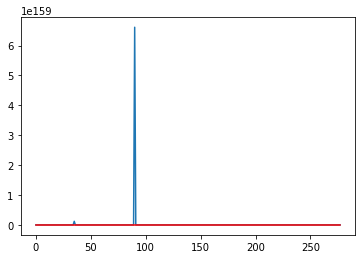

CPU times: user 24min 47s, sys: 3min 31s, total: 28min 18s
Wall time: 23min 8s


In [8]:
%%time
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

X = data.values
size = 8000#int(len(X) * 0.995)
train, test = X[:size], X[size:len(X)]

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    #model = ARIMA(history, order=(2, 1, 0)) #AR Model 
    #model = ARIMA(history, order=(0, 1, 2)) #MA Model 
    model = ARIMA(history, order=(2, 0, 2)) #ARMA Model 
    #model = ARIMA(history, order=(2, 1, 2)) #ARIMA Model
    #model = SARIMAX(history, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))#SARIMA
    #For a proper SARIMAX we need an exogenous variable (i.e. another time series)
    # We do not have it in the dataset
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % np.sqrt(error))
# plot
pyplot.plot(np.exp(test))
pyplot.plot(np.exp(predictions), color='red')
pyplot.show()

### Predict Many points in the future

Notice how we feed the number of points when we make predictions

In [9]:
%%time
X = data.values.flatten()
#model = ARIMA(X, order=(2, 1, 0)) #AR Model 
#model = ARIMA(X, order=(0, 1, 2)) #MA Model 
model = ARIMA(X, order=(2, 0, 2)) #ARMA Model 
#model = ARIMA(X, order=(2, 1, 2)) #ARIMA Model
#model = SARIMAX(X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))#SARIMA

model_fit = model.fit()
# multiple step predictions .. we start at the end of the training data
# and we extend into the future by how many points we want
# if you want n future points you should add n-1 
# i.e. if you want 20 points in the future you should do:
# model_fit.predict(start=len(X), end=(len(X)+19))
y_hat = model_fit.predict(start=len(X), end=(len(X)+9))#predict 10 future points
for e in y_hat:
  print(e)

71.39883061141143
73.64568666796572
75.08403261051086
76.02217798529918
76.65081040081654
77.08786916027978
77.40629927353703
77.65121710945095
77.85052722574076
78.02148880021372
CPU times: user 6.02 s, sys: 805 ms, total: 6.82 s
Wall time: 5.69 s
